# ML Project 2
Joseph Bentivegna  
Professor Keene  
10/11/17  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns
from random import shuffle
from numpy.core.umath_tests import inner1d

In [2]:
# setup means of gaussian basis functions (linearly spaced)
basisMeans = np.linspace(0,1,9)

# setup standard deviation of gaussian basis functions
basisSD = 0.3

numObs = 25
beta = 25
alpha = 2

In [3]:
def update(mean, SD, x, y):
    
    # setup variables for basis function creation
    if type(x) == np.float64:
        d = np.zeros((1, 9))
    else:
        d = np.zeros((len(x), 9))
        
    if type(y) == np.ndarray:
        y = np.reshape(y, (len(y), 1))
    
    # create design matrix for the 9 gaussian basis functions (eq 3.4 in txtbook)
    for i in range(d.shape[1]):
        d[:, i] = np.exp(-(x - basisMeans[i])**2/(2*(basisSD)**2))
    
    # update mean and SD using baesian multivariate gaussian conjugate prior
    newSD = np.linalg.inv(np.linalg.inv(SD) + beta*np.dot(np.transpose(d), d))
    newMean = np.dot(newSD, np.dot(np.linalg.inv(SD), mean) + beta*np.dot(np.transpose(d), y))
    
    return newMean, newSD

In [4]:
def plotTruth(ax):
    
    x = np.linspace(0, 1)
    y = np.sin(2*np.pi*x)
    ax.plot(x, y, color='green')
    
    return ax

In [5]:
def plotObs(num, ax):
    
    ax.scatter(x[:num], y[:num])
    
    return ax

In [6]:
def plotPrediction(mean, SD, ax):
    
    # setup variables for basis function creation
    x = np.linspace(0, 1)
    d = np.zeros((len(x), 9))
    
    # create design matrix for the 9 gaussian basis functions (eq 3.4 in txtbook)
    for i in range(d.shape[1]):
        d[:, i] = np.exp(-(x - basisMeans[i])**2/(2*(basisSD)**2))
    
    # make mean prediction
    predicMean = np.transpose(np.matmul(d, mean))
    
    # make SD prediction
    predicSD = np.sqrt(1/beta + inner1d(np.matmul(d, SD), d))

    # set bounds
    upBound = predicMean + predicSD
    lowBound = predicMean - predicSD
    
    # plot
    ax.fill_between(x, upBound.squeeze(), lowBound.squeeze(), facecolor='red', alpha=0.3, interpolate=True)
    ax. plot(x, predicMean.squeeze(), color='red')
    
    return ax

In [7]:
# generate Observations
x = np.linspace(0, 1, numObs)
shuffle(x)
y = np.sin(2*np.pi*x) + np.random.normal(0, np.sqrt(1/beta), numObs)

# prior
pMean  = np.zeros([9, 1])
pSD = alpha * np.identity(9)

# learning from 1st obs
m1, SD1 = update(pMean, pSD, x[0], y[0])

# learning from 2nd obs
m2, SD2 = update(m1, SD1, x[1], y[1])

# learning from 4rd obs
m4, SD4 = update(m2, SD2, x[2:4], y[2:4])

# learning from rest of obs
m25, SD25 = update(m4, SD4, x[4:], y[4:])

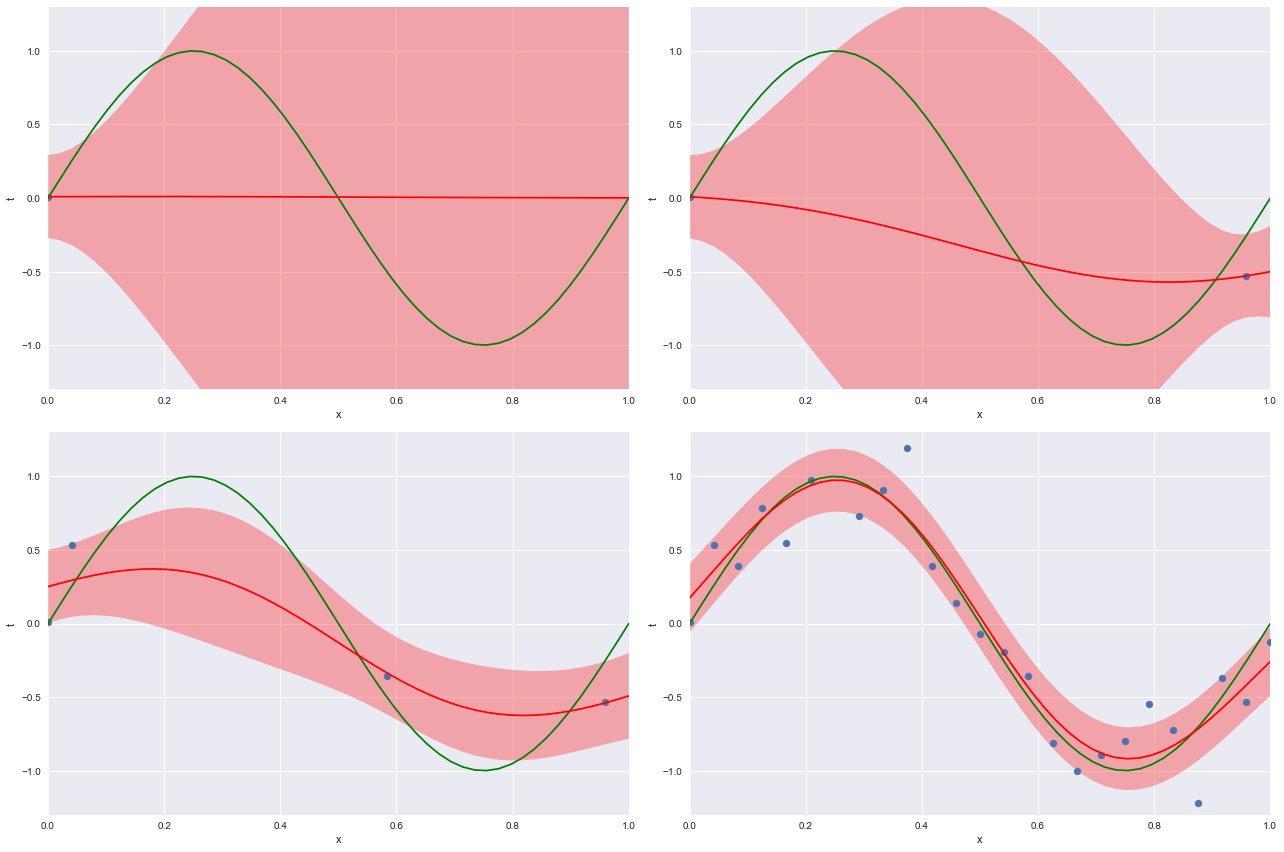

In [8]:
figure, axarr = plt.subplots(nrows=2, ncols=2, figsize=[18, 12])

# plot truth
plotTruth(axarr[0, 0])
plotTruth(axarr[0, 1])
plotTruth(axarr[1, 0])
plotTruth(axarr[1, 1])

# plot predictions
plotPrediction(m1, SD1, axarr[0, 0])
plotPrediction(m2, SD2, axarr[0, 1])
plotPrediction(m4, SD4, axarr[1, 0])
plotPrediction(m25, SD25, axarr[1, 1])

# plot data points
plotObs(1, axarr[0, 0])
plotObs(2, axarr[0, 1])
plotObs(4, axarr[1, 0])
plotObs(25, axarr[1, 1])

for i in range(0, 2):
    for j in range(0, 2):
        axarr[i, j].set_ylim([-1.3, 1.3])
        axarr[i, j].set_xlim([0, 1])
        axarr[i, j].set_ylabel('t')
        axarr[i, j].set_xlabel('x')
        
plt.tight_layout()
sns.despine()
plt.show()